### Test case LVV-T1754: Verify calculation of residual PSF ellipticity correlations for separations greater than or equal to 5 arcmin

Verify that the DM system has provided the code to calculate the median residual PSF ellipticity correlations averaged over an arbitrary field of view for separations greater than or equal to 5 arcmin, and assess whether it meets the requirement that it shall be no greater than **TE2 = 1.0e7**.

**Discussion**: The TEx metrics are calculated and persisted per-visit, and thus reside in the `visit` table. To verify this requirement, we retrieve the measurements and perform additional calculations in the notebook. Eventually we plan to include these calculations, and related plots and metrics, in the `analysis_tools` package.

In [1]:
from lsst.daf.butler import Butler
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

from lsst.utils.plotting import publication_plots
publication_plots.set_rubin_plotstyle()
from matplotlib.ticker import ScalarFormatter

While the [TargetRefcatDeltaPhotomMetrics](https://github.com/lsst/analysis_tools/blob/e52006734b52f2011d899b2a94f549ff4b88daf7/python/lsst/analysis/tools/atools/refCatMatchPlots.py#L778-L855) task to calculate the offsets exists in `analysis_tools`, it is not part of the default pipelines. For this test, we ran the task on the LSSTCam data processed with w_2025_37 of the DRP pipeline. The results are retrieved from the relevant collection below.

NOTE: currently on a branch -- to be merged soon!

Code that adds it to the visit summary table: https://github.com/lsst/drp_tasks/blob/2d1432dc37d3130be2872ad98928836b8227db9d/python/lsst/drp/tasks/update_visit_summary.py#L870-L874

[PR](https://github.com/lsst/pipe_tasks/pull/1159) to add to `pipe_tasks`

[PR]() to add to `afw.image._exposureSummaryStats`


In [2]:
testcoll = 'u/leget/LSSTCam/DM-46582/PSF_TEx_w37_run2'
butler = Butler('/repo/main', collections=[testcoll])

#### Retrieve the `visit_table` from the Butler:

In [3]:
visitTable = butler.get("visit_table", instrument="LSSTCam")

The description of residual ellipticity correlation requirements in the [OSS](ls.st/oss) specifies that the requirements should be met for E_1, E_2, and E_X. The calculations for these have already been implemented, so that we must retrieve three separate columns from the `visit_table`: `psfTE2e1`, `psfTE2e2`, and `psfTE2ex`.

For each of these, we plot histograms of their distributions, and overlay a vertical line denoting the median value.

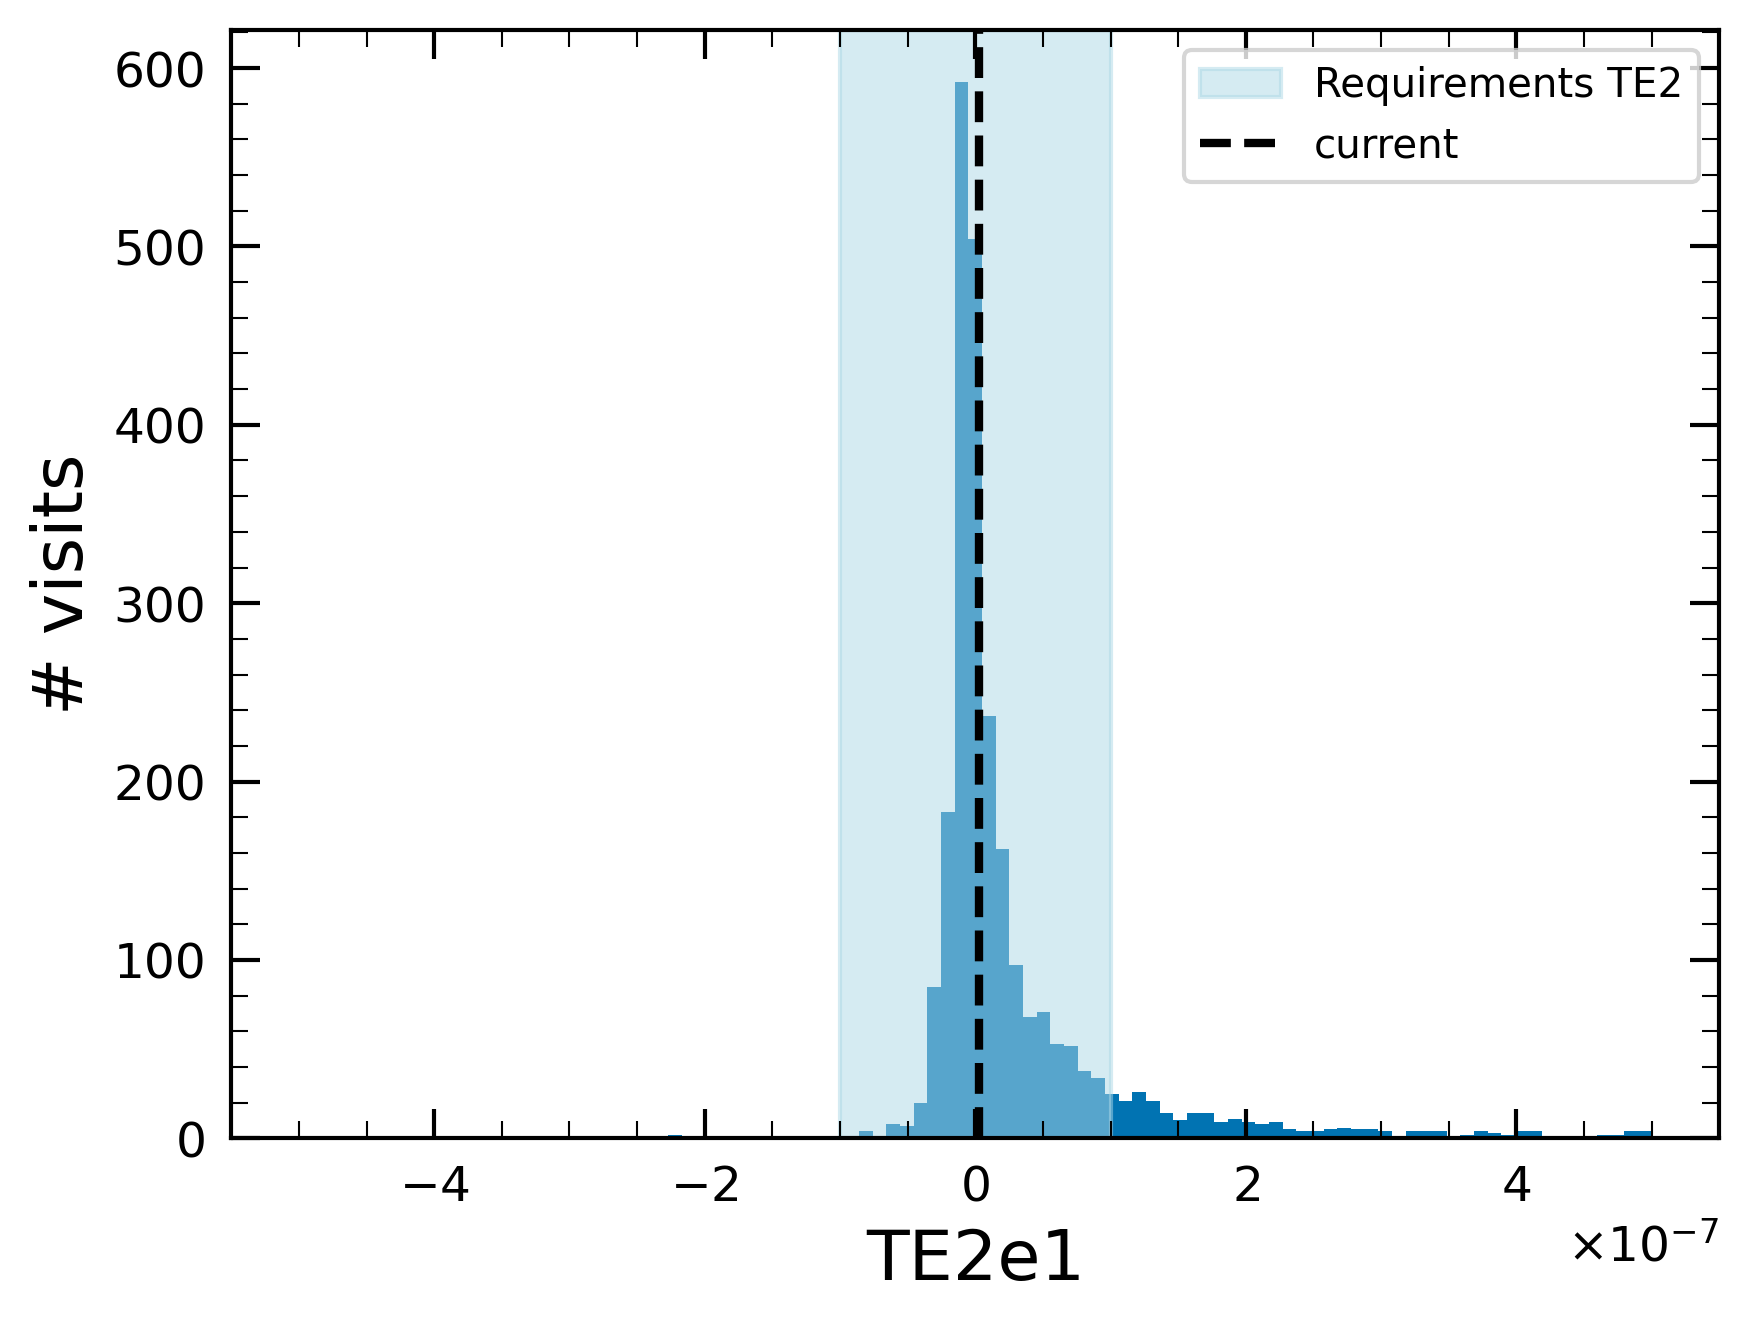

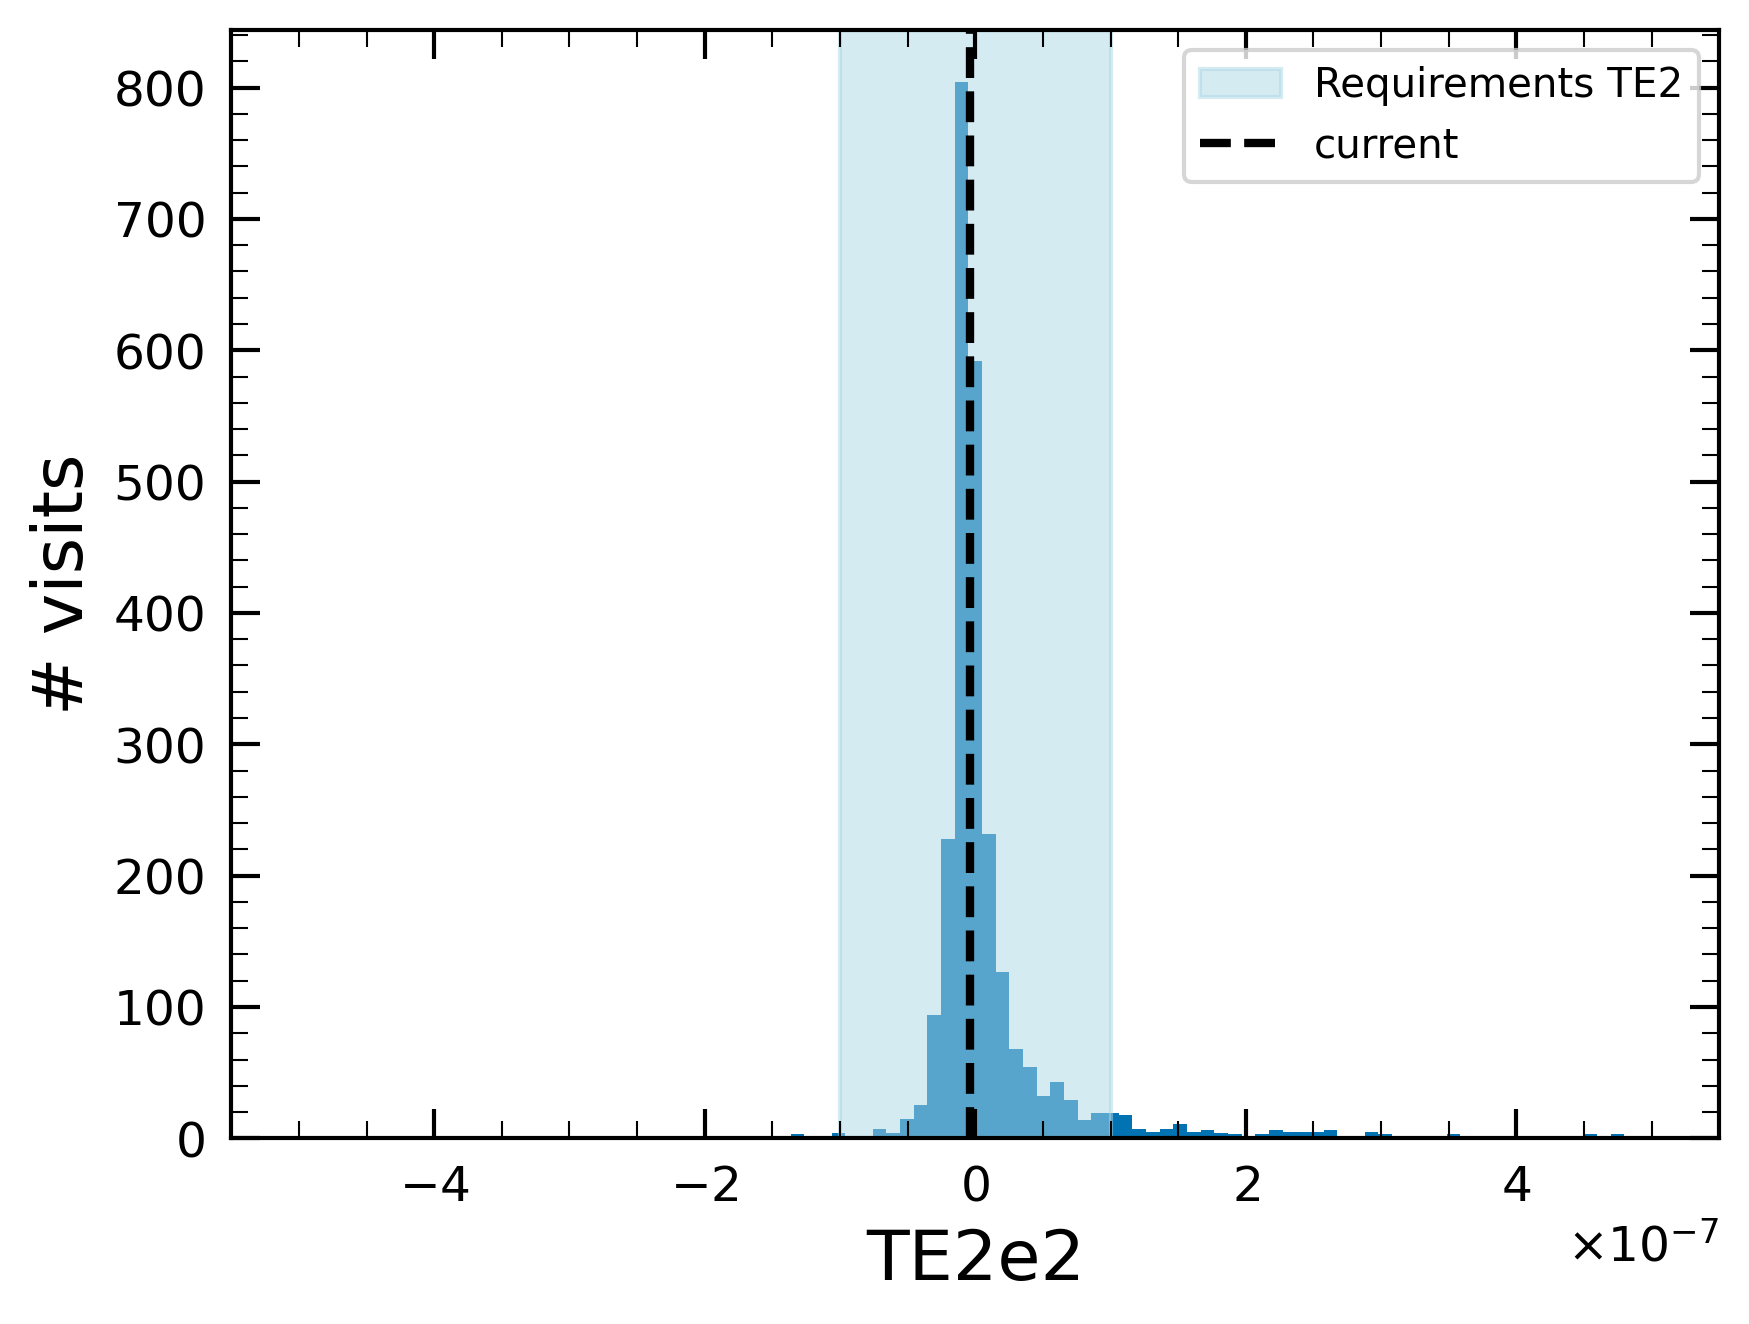

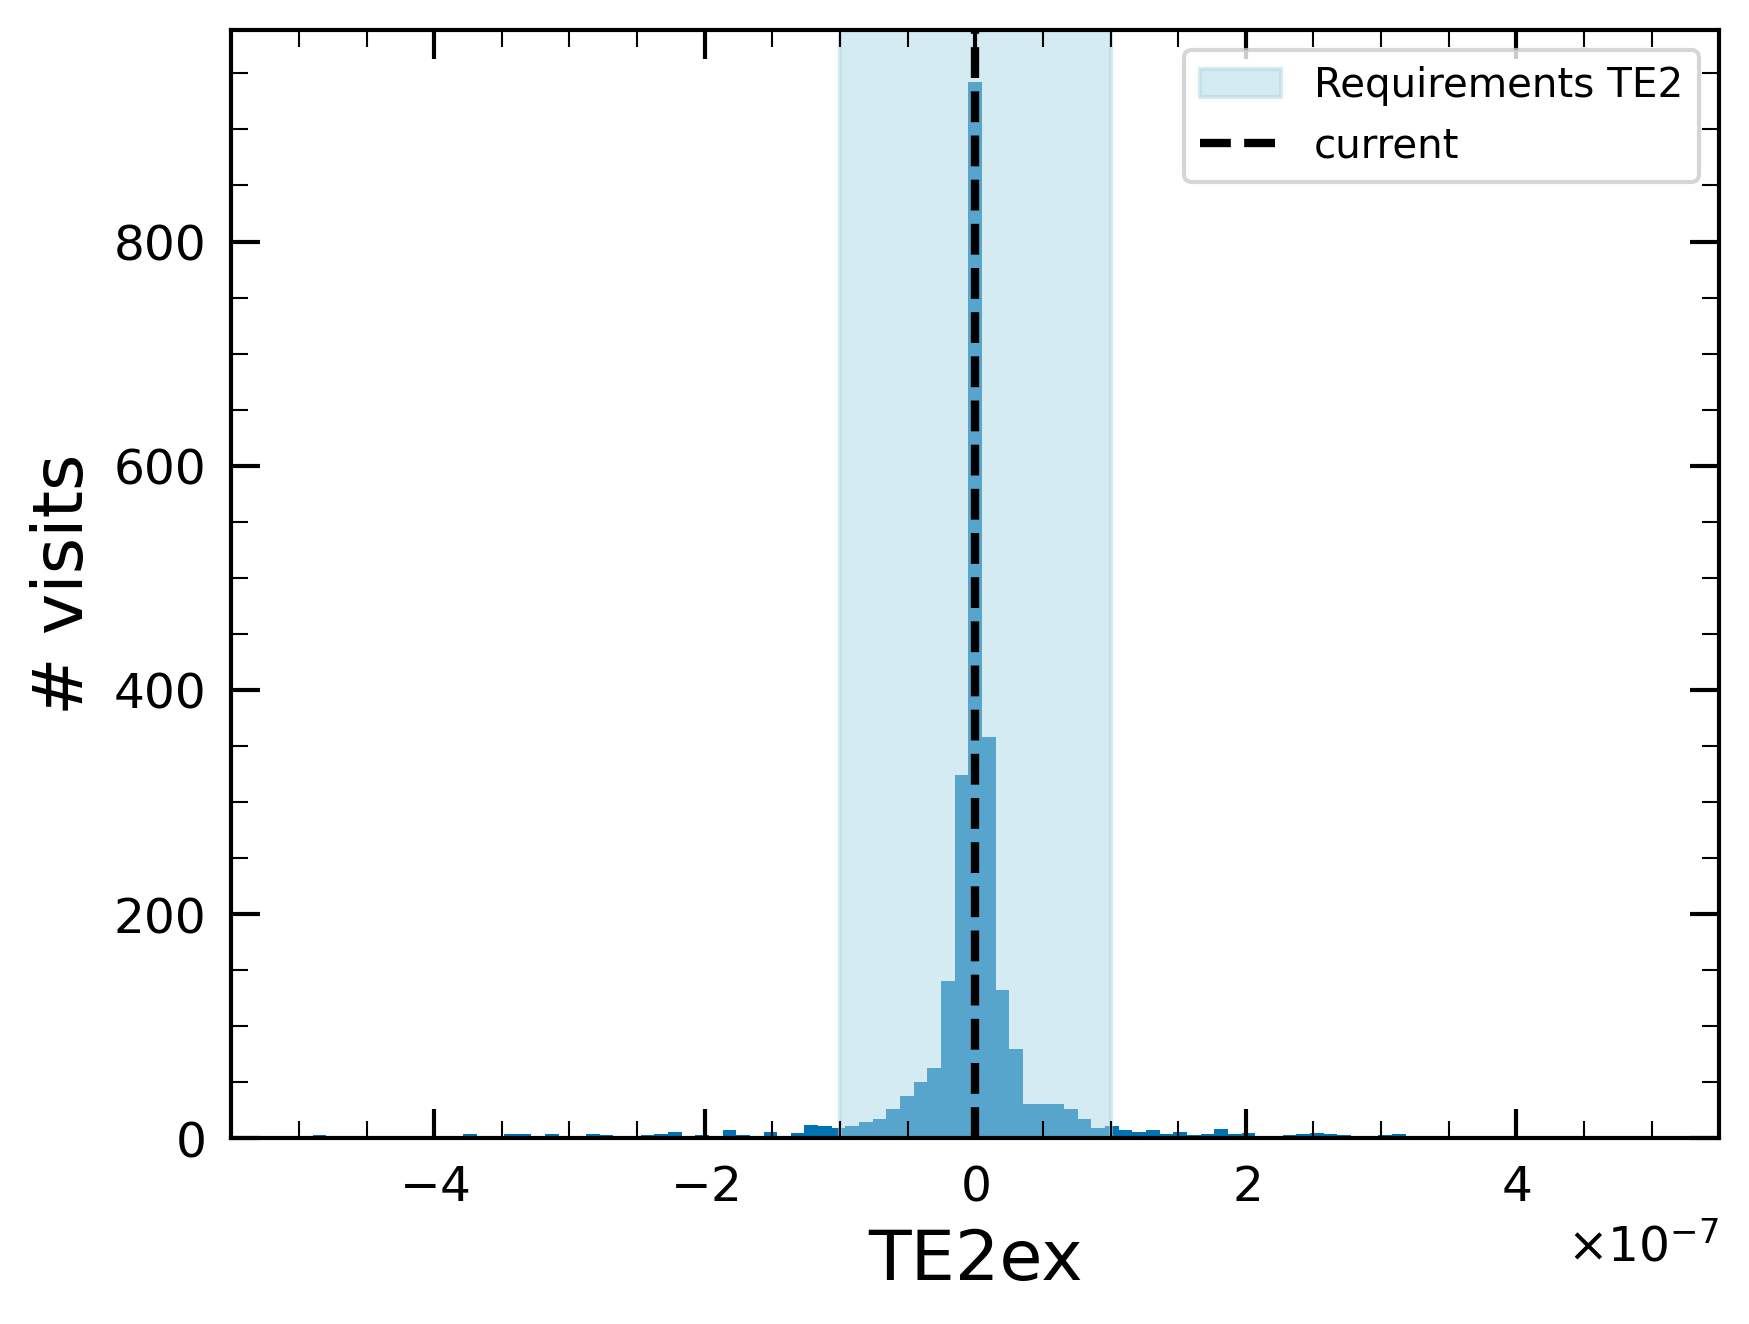

In [9]:
te2_requirement = 1e-7

for i in ['1', '2', 'x']:
    plt.figure()
    plt.hist(visitTable[f'psfTE2e{i}'], bins=np.linspace(-0.5e-6, 0.5e-6, 100))
    plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
    plt.xlabel(f"TE2e{i}")
    plt.ylabel("# visits")
    ylim = plt.ylim()
    plt.gca().fill_betweenx(ylim, -te2_requirement, te2_requirement, color='lightblue', alpha=0.5, label='Requirements TE2')
    medVal = np.nanmedian(visitTable[f'psfTE2e{i}'])
    plt.plot([medVal, medVal], ylim, 'k--', label="current")
    plt.ylim(ylim)
    plt.legend()
    plt.show()


## Results

We have demonstrated that software tools exist to calculate residual ellipticity correlations, and that those quantities can be easily compiled for analysis. We see in the figures above that the median residual ellipticity correlation on scales of greater than or equal to 5 arcmin, TE2, is within the required threshold for all three ellipticity quantities. We deem the result of this test a **Pass**.